In [1]:
from main import Model

In [2]:
import pandas as pd
import numpy as np

def apply_target(data_target):
  return np.where(data_target=='M', -1, 1)

model = Model('./dataset/tp1_ej1_training.csv', (1, 11), (0, 1), apply_target)

epoch 0 - error 1/200
epoch 100 - error 113.50707137861954/200
epoch 200 - error 42.05142813595261/200
epoch 300 - error 21.18967970155031/200
epoch 400 - error 10.27569433270814/200
epoch 500 - error 6.283483952133312/200
epoch 600 - error 4.246092406332641/200
epoch 700 - error 3.0391596276076345/200
epoch 800 - error 2.371068571576895/200
epoch 900 - error 1.9088391947940067/200


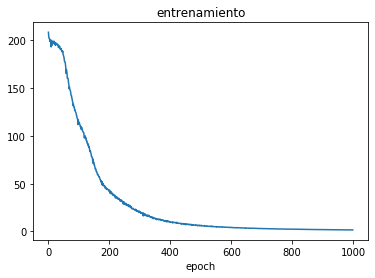

0.85


In [3]:
model.exp(
    [10, 9, 1],
    1000,
    0.01,
    (0, 200),
    (200, 400)
)